# ¿Cómo podemos optimizar los recursos económicos de un club para lograr un rendimiento deportivo superador?

##Cargamos librerías y dataset##





In [68]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


In [137]:
#Cargamos las librerías
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
### Load relevant packages
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import pandas_profiling
# https://community.plot.ly/t/solved-update-to-plotly-4-0-0-broke-application/26526/2
import os
#%matplotlib inline
#plt.style.use('ggplot')
from bokeh.resources import INLINE
import bokeh.io
from bokeh import *
bokeh.io.output_notebook(INLINE)
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score



In [70]:
#Cargamos el dataset
df = 'https://raw.githubusercontent.com/adrianogennari22/coder/main/FM%202023.csv'
df = pd.read_csv (df)
df.head()

Name  Position  Age   ca   pa     Nationality  \
0     Kevin De Bruyne  M/AM RLC   31  189  189         Belgium   
1       Kylian Mbappé   AM/S RL   23  188  197          France   
2  Robert Lewandowski         S   33  186  190          Poland   
3      Erling Haaland         S   22  185  195  Norway,England   
4       Mohamed Salah   AM/S RL   30  185  187           Egypt   

                  Club  Corners  Crossing  Dribbling  ...  World reputation  \
0      Manchester City       14        19         15  ...              9400   
1  Paris Saint-Germain       13        13         18  ...              9248   
2            Barcelona        3         8         13  ...              9250   
3      Manchester City        7        10         14  ...              8750   
4            Liverpool       12        14         17  ...              8750   

                            Race  RCA  Colour of skin  Date of birth  \
0              Northern_European  181               4      1991/6/28   
1              African_Caribbean  172              13     1998/12/20   
2              Northern_European  183               3      1988/8/21   
3              Northern_European  185               2      2000/7/21   
4  North_African__Middle_Eastern  181               9      1992/6/15   

   Number of national team appearances  Goals scored for the national team  \
0                                   91                                  24   
1                                   57                                  27   
2                                  132                                  76   
3                                   21                                  20   
4                                   85                                  47   

      Salary  Rental club       UID  
0   394372.0          NaN  18004457  
1  1035616.0          NaN  85139014  
2   345204.0          NaN    719601  
3   394372.0          NaN  29179241  
4   405971.0          NaN  98028755  

[5 rows x 98 columns]

## Diccionario de datos ##


### Ficha ###

Name - Nombre

Position- Posición

Age - Edad

ca - Calidad actual

pa - Calidad potencial

Nationality - Nacionalidad

Club -Club


###Atributos técnicos ###
Corners - Ejecución de tiros de esquina

Crossing - Cruce

Dribbling - Regate

Finishing - Finalización de las jugadas

First touch - Primer toque

Free kick taking - Ejecución de pelota parada

Heading - Cabezazo

Long Shots - Pase largo

Long throws - Saque largo

Marking - Marca

Passing - Pase

Penalty Taking - Ejecución de penales

Tackling - Cruce

Technique - Técnica

### Atributos mentales ###

Agression - Agresividad en el cruce

Anticipation - Anticipación

Bravery - Valentía

Composure - Compostura

Concentration - Concentración

Vision - Visión

Decition - Decisión

Determination - Determinación

Flair - Instinto

Leadership - Liderazgo

Off The Ball - Desmarques (movimiento sin pelota)

Position - Colocación

Teamwork - Trabajo en equipo

Work Rate - Lucha

Command Of Area - Liderazgo en el área

Communication - Comunicación

Eccentricity - Exentricidad

Handling - Manejo

Kicking - Fuerza de patada

One On Ones - Mano a mano

Reflexes - Reflexividad

Rushing Out - Salida rápida

Punching - golpe de puño

Throwing - Lanzamiento

Adaptation - Adaptación

Ambition - Ambición

Argue - Argumentación

Loyal - Lealtad

Resistant to stress - resistencia al stress

Professional - Profesionalismo

Sportsmanship - Deportividad

Emotional control - Control emocional


### Atributos físicos ###

Acceleration - Aceleración

Agility	 - Agilidad

Balance - Balance

Jumping - Salto

Reach - Alcance

Natural Fitness – Forma natural

Pace - Paso (ritmo)

Stamina - Resistencia

Strength - Fuerza

Stability - Estabilidad

Foul - Faltas

Contest performance - Desempeño en duelos

Injury - Lesiones

diversity - Diversidad

Aerial Reach - Salto

Height - Altura

Weight - Peso

Left Foot - Manejo de pierna izquierda

Right Foot - Manejo de pierna derecha


###Posiciones###

GK

DL

DC

DR

WBL

WBR

DM

ML

MC

MR

AML

AMC

AMR

ST

###Atributos de mercado###

Values	- Valor

Current reputation - Reputación actual

Domestic reputation - Reputación doméstica

World reputation - Reputación mundial

Number of national team appearances - Apariciones en selección nacional

Goals scored for the national team - Goles en selección nacional

Salary - Salario

Rental club - Club de cesión

##Hipótesis y objetivos##


**Objetivo analítico**
Con la intención de poder predecir cuáles serán los jugadores más demandados en el mercado, los de mayor rendimiento salario/valor o salario/rendimiento deportivo, entrenaremos un algoritmo para aportar soluciones a las demandas específicas.

**Contexto empresarial**
En la actualidad, el fútbol profesional masculino se ha convertido en una de las industrias que generan más ingresos. La FIFA realizó un informe en el que detalla los números que se movieron durante el 1° de junio y el 1° de septiembre de 2023, donde hubo un gasto cercano a los 7360 millones de dólares, posicionándose como el año con más traspasos en la historia. En total se realizaron poco más de 10 mil traspasos entre clubes.
Insertados en ese contexto y sin dejar de tener en cuenta que se trata de un deporte y, como tal, no responde solo a lógicas económicas, el rendimiento en competencia suele conducir a mejores rendimientos económicos.
Buscaremos, entonces, predecir qué buscará el mercado en momentos específicos. Así, podremos lograr mejores resultados económicos y una consiguiente mejora deportiva, siendo las finanzas una de las variables más influyentes en el resultado del deporte.


**Problema comercial**
La tarea es proporcionar visualizaciones para obtener los jugadores que más se acerquen a las características requeridas. Se pueden tener en cuenta variables como presupuesto para fichajes, presupuesto para sueldos, resultados esperados, necesidad de una posición particular, relación entre jugadores dentro del plantel en base a atributos mentales, etc.
De acuerdo al objetivo en la temporada (potenciar el plantel, obtener rendimientos económicos a mediano o largo plazo, etc) se deben presentar visualizaciones que respondan a las demandas.   

**Contexto analítico**
Contamos con un dataset tiene un registro de gran cantidad de jugadores de fútbol en actividad a nivel mundial, con descriptores de las características físicas y psicológicas relevantes y valoraciones de atributos técnicos indispensables para el deporte. Al tratarse de datos subjetivos, debemos tener en cuenta que las valoraciones dependen de la experiencia y observaciones particulares de los ojeadores. Forma parte de la base de datos del juego de PC Football Manager 2023, lanzado a fines de 2022, por lo que los atributos y valores están expresados teniendo en cuenta esa realidad.




**Descripción del dataset**
El dataset tiene un registro de gran cantidad de jugadores de fútbol en actividad a nivel mundial, con descriptores de las características físicas y psicológicas relevantes y valoraciones de atributos técnicos indispensables para el deporte. Al tratarse de datos subjetivos, debemos tener en cuenta que las valoraciones dependen de la experiencia y observaciones particulares de los ojeadores. Forma parte de la base de datos del juego de PC Football Manager 2023, lanzado a fines de 2022, por lo que los atributos y valores están expresados teniendo en cuenta esa realidad.  

**Hipótesis/preguntas**
¿Cómo podemos optimizar los recursos económicos destinados a afrontar la temporada? El presupuesto anual influirá mucho en el rendimiento del equipo en las competiciones, por lo que un error en la conformación de la plantilla puede repercutir en el desempeño.
La idea es poder reducir el margen de error que supone toda práctica deportiva y sus problemas a resolver a lo largo de la competencia, pudiendo suponer el éxito de un mercado de pases con un análisis de datos disponibles. Entonces, podemos responder preguntas como las siguientes, entre muchas otras:
¿Es necesario contratar jugadores con más experiencia?
¿A qué costo podemos contratar promesas?
¿Qué jugadores son los más viables de transferir, teniendo en cuenta la ganancia del fichaje, la calidad que se perdería y la reducción de carga salarial?

**Objetivo y alcance**
El objetivo es poder predecir rendimiento de un plantel, teniendo en cuenta su conformación, así como poder elegir mejores tácticas para aprovechamiento de las características. Por otro lado, como herramienta para gestión deportiva, podremos buscar los jugadores que mejor se adapten a las necesidades del cuerpo técnico o una futura promesa, pudiendo filtrar por recursos, nivel esperado o inicial de temporada. Además, podremos conformar una plantilla que sea compatible hacia adentro teniendo en cuenta indicadores de personalidad o psicológicos.




##**Mostramos algunos datos con gráficos**##

Usaremos herramientas gráficas para analizar el mercado, a la hora de buscar reforzar el plantel, vender jugadores o adecuar los salarios de la plantilla. Por un lado, vemos cómo la edad de los jugadores parece explicar los salarios. Así, un jugador entre los 25 y los 30 años alcanzará su pico salarial y repercutirá en la erogación de dinero que se deberá hacer para contratar a un refuerzo. En el segundo gráfico vemos cómo influye la calidad (actual y esperada) de un jugador en su valor de compra/venta. El gráfico muestra que existe una correlación entre la calidad y el costo del fichaje, así como también la menor predicción del método a la hora de buscar contratar en base a la expectativa, encontrándose una mayor dispersión.

Text(0, 0.5, 'Salario')

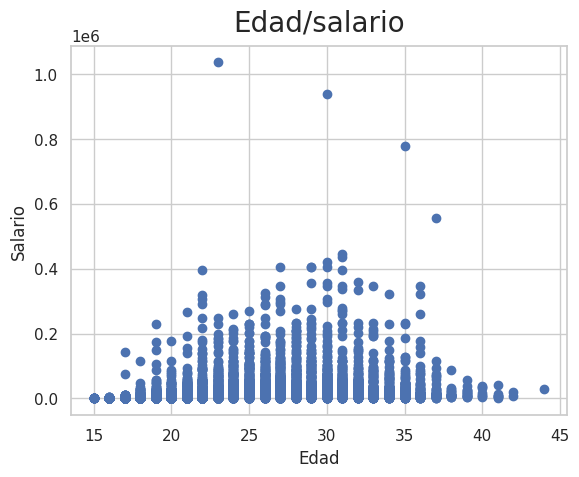

In [71]:
plt.scatter(df ['Age'],df ['Salary'])
plt.title("Edad/salario", fontsize=20, verticalalignment='bottom')
plt.xlabel("Edad")
plt.ylabel("Salario")

¿Hay una relación entre edad y salario?
Podemos visualizar una relación entre la edad de los futbolistas y su salario. Tener una plantilla con jugadores con una edad de entre 25 y 30 años repercutirá en un mayor gasto en salarios.  


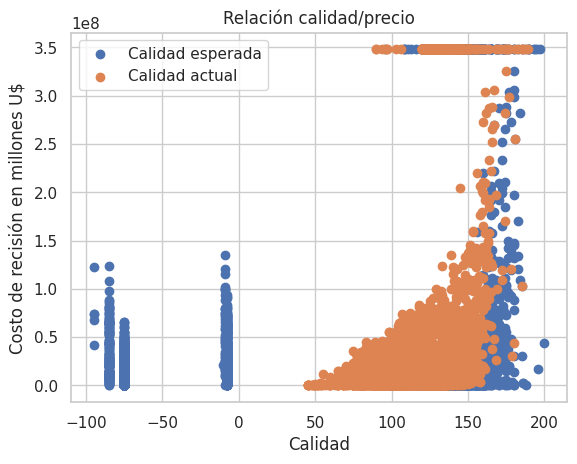

In [72]:
plt.scatter(df['pa'],df ['Values'], label='Calidad esperada')
plt.scatter(df['ca'],df ['Values'], label='Calidad actual')
plt.xlabel('Calidad')
plt.ylabel('Costo de recisión en millones U$')
plt.title('Relación calidad/precio')
plt.legend()
plt.show()

Repercute el momento de la carrera de un jugador (calidad actual) en su valuación?
Vemos que a medida que aumentan la calidad esperada y actual hay un crecimiento en el coste inicial, lo que indica que el mercado está equilibrado.

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


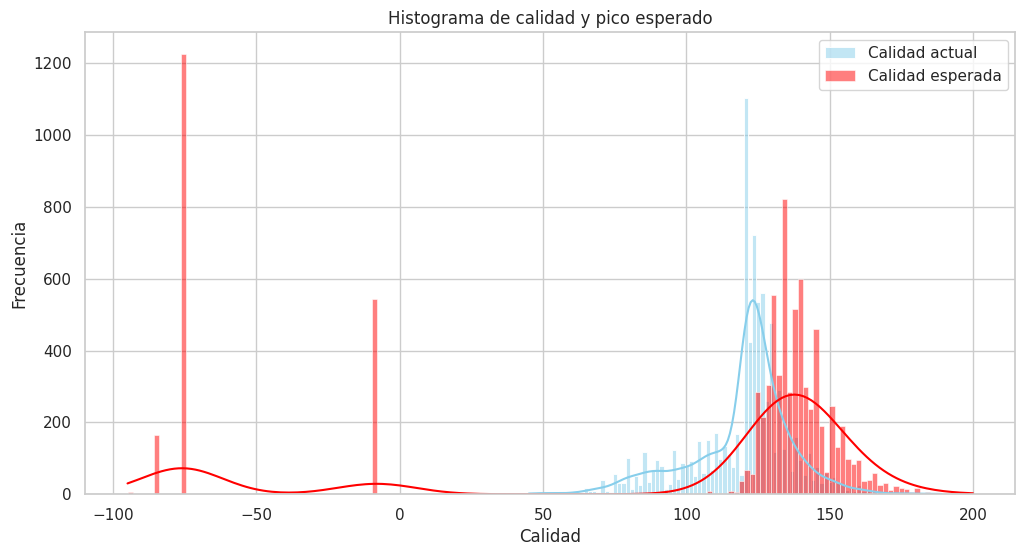

In [73]:
# Selección del estilo
sns.set(style="whitegrid")

# Histograma para ca y pa
plt.figure(figsize=(12, 6))
sns.histplot(df['ca'], color="skyblue", label="Calidad actual", kde=True)
sns.histplot(df['pa'], color="red", label="Calidad esperada", kde=True)

# Agregando títulos y etiquetas
plt.title('Histograma de calidad y pico esperado')
plt.xlabel('Calidad')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

##Limpiamos de nulos nuestro dataset y realizamos forward selection##

In [74]:
def nulos(df):
  cant= len(df)
  for col in df.columns:
       print (col, ':', round(df[col].isnull().sum() *100 / cant, 2), '%')

nulos(df)

Name : 0.0 %
Position : 0.0 %
Age : 0.0 %
ca : 0.0 %
pa : 0.0 %
Nationality : 0.0 %
Club : 1.27 %
Corners : 0.0 %
Crossing : 0.0 %
Dribbling : 0.0 %
Finishing : 0.0 %
First Touch : 0.0 %
Free Kick Taking : 0.0 %
Heading : 0.0 %
Long Shots : 0.0 %
Long Throws : 0.0 %
Marking : 0.0 %
Passing : 0.0 %
Penalty Taking : 0.0 %
Tackling : 0.0 %
Technique : 0.0 %
Aggressiion : 0.0 %
Anticipation : 0.0 %
Bravery : 0.0 %
Composure : 0.0 %
Concentration : 0.0 %
Vision : 0.0 %
Decision : 0.0 %
Determination : 0.0 %
Flair : 0.0 %
Leadership : 0.0 %
Off The Ball : 0.0 %
Position.1 : 0.0 %
Teamwork : 0.0 %
Work Rate : 0.0 %
Acceleration : 0.0 %
Agility : 0.0 %
Balance : 0.0 %
Jumping Reach : 0.0 %
Natural Fitness : 0.0 %
Pace : 0.0 %
Stamina : 0.0 %
Strength : 0.0 %
Stability : 0.0 %
Foul : 0.0 %
Contest performance : 0.0 %
Injury : 0.0 %
diversity : 0.0 %
Aerial Reach : 0.0 %
Command Of Area : 0.0 %
Communication : 0.0 %
Eccentricity : 0.0 %
Handling : 0.0 %
Kicking : 0.0 %
One On Ones : 0.0 %
Reflex

In [75]:
df= df.dropna()
df

Name      Position  Age   ca   pa  \
56               Romelu Lukaku             S   29  162  176   
157           Dejan Kulusevski       M/AM RC   22  153  171   
175        Georginio Wijnaldum    DM/M/AM LC   31  153  161   
211              Lucas Ocampos         AM RL   28  152  155   
217            Arkadiusz Milik             S   28  151  160   
262               Mauro Icardi             S   29  150  174   
270                   Angeliño      D/WB/M L   25  149  156   
290           Manuel Locatelli        DM/M C   24  149  162   
292            Leandro Paredes        DM/M C   28  149  154   
317         Callum Hudson-Odoi        AM RLC   21  148  170   
331           Francesco Acerbi           D C   34  147  155   
364              Denis Zakaria        DM/M C   25  146  155   
371               Nicolas Pépé         AM RL   27  146  159   
381          Giacomo Raspadori       AM/S LC   22  146  165   
396               Robin Gosens      D/WB/M L   28  145  156   
397                Brahim Díaz        AM RLC   22  145  158   
406              Ander Herrera        DM/M C   32  145  156   
422           Giovani Lo Celso    DM/M/AM LC   26  145  151   
426                 Santi Mina             S   26  145  146   
446            Clément Lenglet           D C   27  144  154   
478                     Arthur        DM/M C   25  143  155   
486              Nikola Vlašić      M/AM RLC   24  143  155   
503           Giovanni Simeone             S   26  143  150   
508              Antonín Barák        M/AM C   27  143  148   
532            Tanguy Ndombele        DM/M C   25  143  155   
538             Destiny Udogie      D/WB/M L   19  142   -9   
549                 Renan Lodi      D/WB/M L   24  142  157   
566               Julian Weigl        DM/M C   26  142  150   
574          Alexander Sørloth             S   26  142  148   
599                      Portu       M/AM RC   30  141  154   
605          Francisco Trincão         AM RL   22  141  162   
614            Sergio Reguilón        D/WB L   25  141  152   
633                      Óscar       M/AM LC   24  141  158   
655             Dean Henderson            GK   25  140  160   
665              Omar Alderete           D C   25  140  149   
674               Jan Bednarek           D C   26  140  145   
692             Julian Draxler      M/AM RLC   28  140  151   
696               Zack Steffen            GK   27  140  146   
701              Wout Weghorst             S   29  140  147   
714        Grzegorz Krychowiak        DM/M C   32  140  155   
733          Diadié Samassékou        DM/M C   26  140  145   
737               Sergiño Dest       D/WB RL   21  140  155   
777            Justin Kluivert       M/AM RL   23  139  155   
782            Martin Dúbravka            GK   33  139  150   
797                  Dele Alli         AM LC   26  139  160   
799                Samuel Lino       AM/S RL   22  139  152   
810            Luca Pellegrini      D/WB/M L   23  138  155   
834                Harry Winks        DM/M C   26  138  144   
846                     Maycon           M C   25  138  148   
874           Alexey Miranchuk       M/AM RC   26  138  144   
877           Gianluca Caprari      AM/S RLC   28  138  142   
887           Yeferson Soteldo          AM L   25  138  146   
893             Yangel Herrera        DM/M C   24  138  155   
910                Éric Bailly           D C   28  137  150   
918                 Moise Kean       AM/S RL   22  137  156   
928               Abdou Diallo          D LC   26  137  145   
934                Conor Coady           D C   29  137  144   
941                Boulaye Dia           S R   25  137  145   
942            Alexander Nübel            GK   25  137  155   
948              Stefano Sensi     DM/M/AM C   26  137  150   
950               Yusuf Yazıcı       M/AM RC   25  137  145   
951                       Tetê        M/AM R   22  137  156   
952             Matteo Pessina        M/AM C   25  137  1

In [76]:
df_numericos =df.select_dtypes (include=[np.number])
df_numericos

Age   ca   pa  Corners  Crossing  Dribbling  Finishing  First Touch  \
56     29  162  176        4        10         13         18           13   
157    22  153  171       11        14         16         13           15   
175    31  153  161        8        12         15         12           16   
211    28  152  155       10        12         16         15           14   
217    28  151  160       10        10         12         16           15   
262    29  150  174        4         7         12         18           15   
270    25  149  156       13        17         13         10           12   
290    24  149  162       11        11         12         11           15   
292    28  149  154       15        12         14         11           15   
317    21  148  170       10        15         15          9           15   
331    34  147  155        3         9          7          9           12   
364    25  146  155        7         9         14         10           13   
371    27  146  159       12        12         17         13           14   
381    22  146  165       13        10         13         15           16   
396    28  145  156       11        14         11         15           13   
397    22  145  158       13        13         16         10           16   
406    32  145  156        7        15          9         10           15   
422    26  145  151       11        14         16         11           15   
426    26  145  146       12        10         12         15           14   
446    27  144  154        9        10         11          8           13   
478    25  143  155       12        12         15          8           16   
486    24  143  155       12        12         16         13           15   
503    26  143  150        6         8         12         16           13   
508    27  143  148       10        11         14         15           15   
532    25  143  155        6        10         16         10           15   
538    19  142   -9        7        13         14         11           12   
549    24  142  157       12        14         15         12           15   
566    26  142  150        5         7         11          8           16   
574    26  142  148        7         7         13         15           13   
599    30  141  154       10        11         13         12           12   
605    22  141  162       14        14         16         13           15   
614    25  141  152       10        12         12         10           13   
633    24  141  158       13        10         11         12           14   
655    25  140  160        3         3          3          1           11   
665    25  140  149        3         8         10          6           12   
674    26  140  145        2         7          9          7           11   
692    28  140  151       13        13         16         14           17   
696    27  140  146        4         1          1          3            9   
701    29  140  147        3         8         10         16           14   
714    32  140  155        6         7         11         10           12   
733    26  140  145        8        10         11          7           13   
737    21  140  155        8        14         14          8           14   
777    23  139  155        9        10         16         11           16   
782    33  139  150        1         1          1          1           11   
797    26  139  160        8        12         14         15           14   
799    22  139  152        8         9         14         14           14   
810    23  138  155       10        14         13          7           13   
834    26  138  144       10        10         13         10           14   
846    25  138  148       12         9         11         11           14   
874    26  138  144       13        11         15         13           15   
877    28  138  142       13        13         15         13           15   
88

In [77]:
import statsmodels.api as sm
def forward_selection(x, y, significance_level=0.01):
    initial_features = df_numericos.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(y, sm.add_constant(df_numericos[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<significance_level):
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

## Intentemos explicar si el valor de mercado de un jugador puede explicarse por su reputación (Spoiler, creo que el mercado del fútbol pondera muchas otras variables y se rige por modas y búsqueda de rédito económico extradeportivo)##

In [78]:
y=df["Values"].values
y


array([142679281,  35000000,  35367495,  49692502,  53670146,  40613652,
        25253317,  37258394,  28214999,  71914876,   2361385,  16647882,
        54284132,  25000000,  15000000,  23700000,   7979705,  34710527,
        24619394,  15657934,  11511005,  44210250,  11770090,   9765282,
        32727068,  71914876,  11938062,  15988499,  19060367,  13468949,
        17203734,  27507440,  16078634,  24881967,   7325905,  35991161,
         6945202,   9636219,  33405620,   7048614,  12410833,  24420000,
         9869723,  12724386,  56140000,  13740001,  10557494,  16236262,
        29797572,   9513120,   7972902,   7705391,  16363534,  17798932,
        27999999,   5145562,  43061932,   9060929,   3576621,   4423330,
        12931966,  65175826,   8488460,  12770906,  32361694,   1624188,
        19062192,  20000000,  12614352,   4111059,  63300000,  26620103,
        11099860,   2731452,  22350000,   2309130,   8636080,   3608549,
        40484159,  11563463,    349999,  10962000, 

La reputación es nuestra variable independiente.

In [79]:
reputacion_actual=df[['Current reputation'] ]
reputacion_actual=reputacion_actual.dropna()
x=reputacion_actual.values
x

array([[8150],
       [7650],
       [7650],
       [7595],
       [7550],
       [7700],
       [7248],
       [7450],
       [7450],
       [7400],
       [7350],
       [7300],
       [7300],
       [7298],
       [7250],
       [7250],
       [7250],
       [7250],
       [7250],
       [7242],
       [7150],
       [7150],
       [7146],
       [7150],
       [7150],
       [7100],
       [7099],
       [7100],
       [7100],
       [7050],
       [7050],
       [7050],
       [7000],
       [7089],
       [6600],
       [6995],
       [7000],
       [6750],
       [7000],
       [7000],
       [7000],
       [6995],
       [6950],
       [6550],
       [7100],
       [6950],
       [6900],
       [6893],
       [6875],
       [6900],
       [6900],
       [6823],
       [6900],
       [7050],
       [6850],
       [6844],
       [7000],
       [6845],
       [6840],
       [6846],
       [6900],
       [7500],
       [6850],
       [6850],
       [6800],
       [6800],
       [68

In [80]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)

In [81]:
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,y_pred))

MAE 11764814.774914632


In [82]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred))

MSE 266476582878342.28


In [83]:
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 16324110.477399444


In [84]:
print("RMSE",np.log(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE 16.608153743274656


In [85]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

-0.016192558301794335


Este coeficiente de determinación nos muestra que muy poco de la reputación de un jugador en la actualidad explica su valor, lo qu eindica que hay otras variables que tienen más peso, o bien hay mercados que no responden totalmente a la lógica. Seguiremos examinando el dataset para lograr nuevos acercamientos.
En cuanto a la desviación cuadrática media, podemos llegar a las mismas conclusiones

Probemos qué pasa si usamos la reputación mundial y no la reputación actual.

In [86]:
reputacion_mundial=df[['World reputation'] ]
reputacion_mundial=reputacion_mundial.dropna()
rm=reputacion_mundial.values
rm

array([[7984],
       [6850],
       [6500],
       [5995],
       [6800],
       [7000],
       [5998],
       [6500],
       [6750],
       [6250],
       [6500],
       [5750],
       [6500],
       [5698],
       [6500],
       [5870],
       [6250],
       [6250],
       [7262],
       [6492],
       [6250],
       [5750],
       [5746],
       [5500],
       [6350],
       [5000],
       [6184],
       [6200],
       [5750],
       [5950],
       [5550],
       [6250],
       [5000],
       [5989],
       [5250],
       [5654],
       [5750],
       [6000],
       [6700],
       [6000],
       [6000],
       [5995],
       [5750],
       [5750],
       [7000],
       [5226],
       [5500],
       [5743],
       [4997],
       [5500],
       [5300],
       [4028],
       [5500],
       [6250],
       [5800],
       [5351],
       [5750],
       [4249],
       [5240],
       [6246],
       [5250],
       [6000],
       [6100],
       [4700],
       [5000],
       [6700],
       [57

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(rm,y,test_size=0.2,random_state=2)
from sklearn.linear_model import LinearRegression
# crear el modelo
lr = LinearRegression()
# Ajustar el modelo con X_train y y_train
lr.fit(X_train,y_train)
# PRedecir con X_test
y_pred = lr.predict(X_test)

In [88]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print(r2)

-0.010213381858371173


Vemos que hay diferencias, pero no son significativas. A partir de estas pruebas, podemos inferir que el valor de mercado de los futbolistas no se explica por su reputación, si no que tiene que ver con variables extrafutbolísticas (presencia en redes sociales, publicidad, contratos de televisación)

##Data Wrangling.

Comenzamos a limpiar el dataset de valores nulos, erróneos o irrelevantes

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 995 entries, 56 to 8428
Data columns (total 98 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Name                                 995 non-null    object 
 1   Position                             995 non-null    object 
 2   Age                                  995 non-null    int64  
 3   ca                                   995 non-null    int64  
 4   pa                                   995 non-null    int64  
 5   Nationality                          995 non-null    object 
 6   Club                                 995 non-null    object 
 7   Corners                              995 non-null    int64  
 8   Crossing                             995 non-null    int64  
 9   Dribbling                            995 non-null    int64  
 10  Finishing                            995 non-null    int64  
 11  First Touch                        

In [90]:
#Veamos si hay datos duplicados
print(df.shape)
train= df.drop_duplicates()
print(df.shape)

(995, 98)
(995, 98)


In [91]:
# Columnas con porcentaje de nulos
pd.set_option('display.max_rows', None)  # or 1000
serie=(df.isnull().sum()/df.shape[0])*100
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Series([], dtype: float64)

In [92]:
pip install missingno

<Axes: >

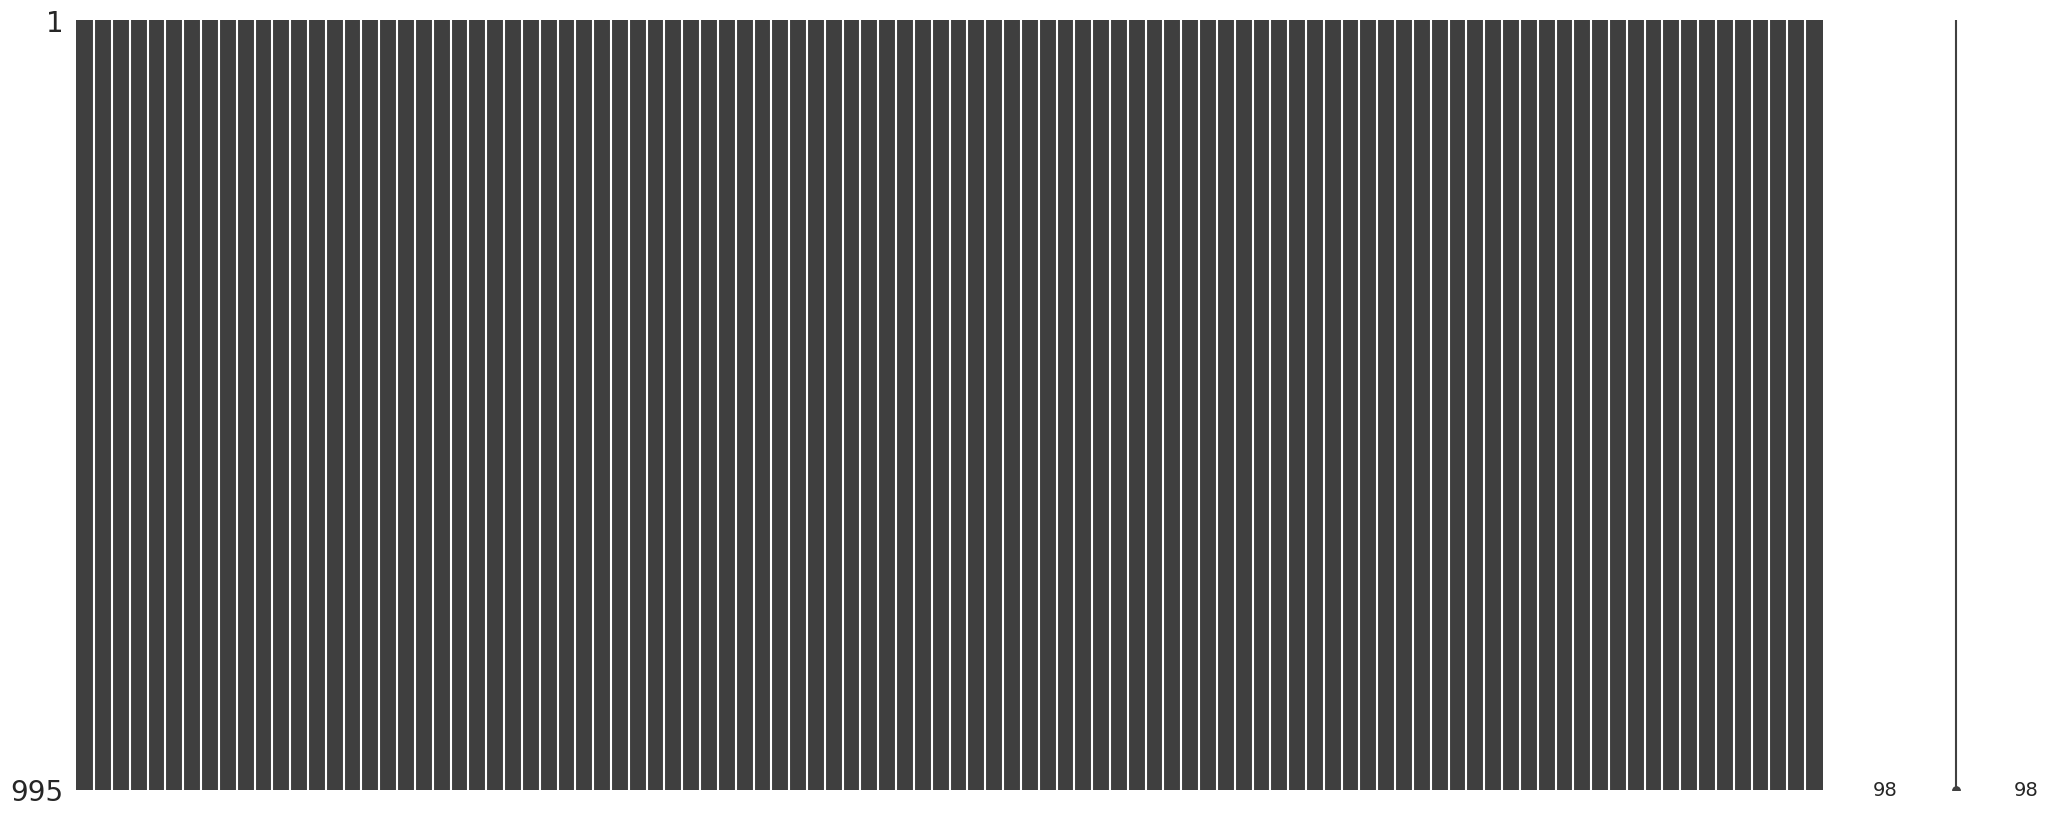

In [93]:
import missingno as msno
msno.matrix(df)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


<Axes: >

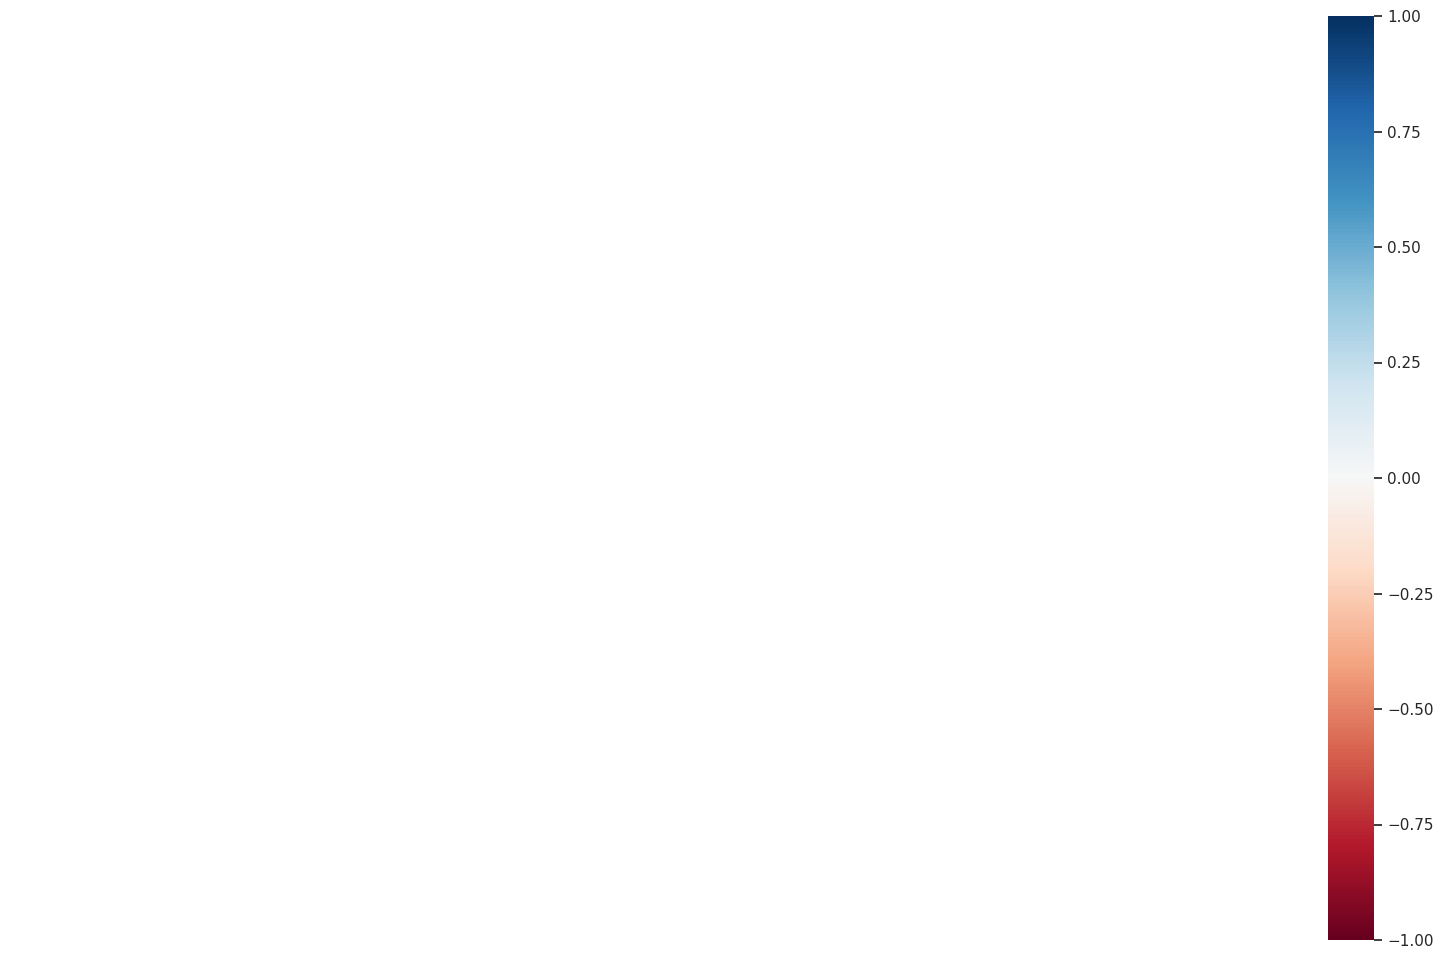

In [94]:
msno.heatmap(df)

In [95]:
# Obtener las columnas de tipo 'object'
columnas_object = df.select_dtypes(include=['object']).columns
print (columnas_object)

Index(['Name', 'Position', 'Nationality', 'Club', 'Race', 'Date of birth',
       'Rental club'],
      dtype='object')


In [96]:
# Obtener las columnas numéricas de tipo 'int64'
columnas_int64 = df.select_dtypes(include=['int64']).columns
print (columnas_int64)

Index(['Age', 'ca', 'pa', 'Corners', 'Crossing', 'Dribbling', 'Finishing',
       'First Touch', 'Free Kick Taking', 'Heading', 'Long Shots',
       'Long Throws', 'Marking', 'Passing', 'Penalty Taking', 'Tackling',
       'Technique', 'Aggressiion', 'Anticipation', 'Bravery', 'Composure',
       'Concentration', 'Vision', 'Decision', 'Determination', 'Flair',
       'Leadership', 'Off The Ball', 'Position.1', 'Teamwork', 'Work Rate',
       'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability', 'Foul',
       'Contest performance', 'Injury', 'diversity', 'Aerial Reach',
       'Command Of Area', 'Communication', 'Eccentricity', 'Handling',
       'Kicking', 'One On Ones', 'Reflexes', 'Rushing Out', 'Punching',
       'Throwing', 'Adaptation', 'Ambition', 'Argue', 'Loyal',
       'Resistant to stress', 'Professional', 'Sportsmanship',
       'Emotional control', 'GK', 'DL', 'DC', 'DR', 'WBL', 'WBR', 'DM', 'ML',
     

In [97]:
#Entre las columnas tipo object, encontramos algunas no relevantes para nuestra búsqueda.
#columnas_a_eliminar = ['Race', 'RCA', 'Colour of skin' ] # Columnas a borrar que no aportan
df = df.drop(columns=['Race', 'RCA', 'Colour of skin'])

In [98]:
#Convertimos la fecha de nacimiento en un dato datetime.
df['Date of birth'] = pd.to_datetime(df['Date of birth'])


Notamos que la columna 'Position' puede contener más de una posición, lo que complejiza la búsqueda. Generamos un nuevo df con las posiciones separadas y concatenamos.

In [99]:
df_nuevo = df['Position'].str.split('/', expand=True)

In [100]:
#¿Cuántas columnas nuevas se generaron?
df_nuevo.shape

(995, 4)

In [101]:
#Renombramos las nuevas columnas
df_nuevo.columns=('Position1', 'Position2', 'Position3', 'Position4')

In [102]:
#Concatenamos el df original y el nuevo con las columnas separadas.
con_posiciones = pd.concat([df, df_nuevo], axis=1)

In [103]:
con_posiciones.head()

Name    Position  Age   ca   pa  \
56         Romelu Lukaku           S   29  162  176   
157     Dejan Kulusevski     M/AM RC   22  153  171   
175  Georginio Wijnaldum  DM/M/AM LC   31  153  161   
211        Lucas Ocampos       AM RL   28  152  155   
217      Arkadiusz Milik           S   28  151  160   

                              Nationality                    Club  Corners  \
56   Belgium,Democratic Republic of Congo                 Chelsea        4   
157                Sweden,North Macedonia                Juventus       11   
175                      Holland,Suriname     Paris Saint-Germain        8   
211                       Argentina,Spain                 Sevilla       10   
217                                Poland  Olympique de Marseille       10   

     Crossing  Dribbling  ...  Date of birth  \
56         10         13  ...     1993-05-13   
157        14         16  ...     2000-04-25   
175        12         15  ...     1990-11-11   
211        12         16  ...     1994-07-11   
217        10         12  ...     1994-02-28   

     Number of national team appearances  Goals scored for the national team  \
56                                   102                                  68   
157                                   25                                   2   
175                                   85                                  26   
211                                   10                                   2   
217                                   62                                  16   

       Salary                 Rental club       UID  Position1  Position2  \
56   405971.0    FC Internazionale Milano  18007344          S       None   
157   88941.0           Tottenham Hotspur  43295814          M      AM RC   
175  210959.0  Associazione Sportiva Roma    859612         DM          M   
211   29897.0                    AFC Ajax  14031132      AM RL       None   
217   75941.0                    Juventus  96026541          S       None   

     Position3  Position4  
56        None       None  
157       None       None  
175      AM LC       None  
211       None       None  
217       None       None  

[5 rows x 99 columns]

Las posiciones atribuidas a cada jugador tienden a generar problemas en el dataset. Eliminemos las columnas de posición, luego usaremos los atributos por posición para agruparlos.

In [104]:
df = con_posiciones.drop(columns=['Position','Position.1', 'Position1', 'Position2', 'Position3', 'Position4'])

In [105]:
df.head()

Name  Age   ca   pa                           Nationality  \
56         Romelu Lukaku   29  162  176  Belgium,Democratic Republic of Congo   
157     Dejan Kulusevski   22  153  171                Sweden,North Macedonia   
175  Georginio Wijnaldum   31  153  161                      Holland,Suriname   
211        Lucas Ocampos   28  152  155                       Argentina,Spain   
217      Arkadiusz Milik   28  151  160                                Poland   

                       Club  Corners  Crossing  Dribbling  Finishing  ...  \
56                  Chelsea        4        10         13         18  ...   
157                Juventus       11        14         16         13  ...   
175     Paris Saint-Germain        8        12         15         12  ...   
211                 Sevilla       10        12         16         15  ...   
217  Olympique de Marseille       10        10         12         16  ...   

        Values  Current reputation  Domestic reputation  World reputation  \
56   142679281                8150                 8982              7984   
157   35000000                7650                 7250              6850   
175   35367495                7650                 8000              6500   
211   49692502                7595                 7595              5995   
217   53670146                7550                 7850              6800   

     Date of birth  Number of national team appearances  \
56      1993-05-13                                  102   
157     2000-04-25                                   25   
175     1990-11-11                                   85   
211     1994-07-11                                   10   
217     1994-02-28                                   62   

     Goals scored for the national team    Salary                 Rental club  \
56                                   68  405971.0    FC Internazionale Milano   
157                                   2   88941.0           Tottenham Hotspur   
175                                  26  210959.0  Associazione Sportiva Roma   
211                                   2   29897.0                    AFC Ajax   
217                                  16   75941.0                    Juventus   

          UID  
56   18007344  
157  43295814  
175    859612  
211  14031132  
217  96026541  

[5 rows x 93 columns]

##Feature Selection, clusterización y algunas predicciones útiles



Busquemos qué características hacen que un jugador ocupe la posición de, supongamos, marcador central (DC en el dataframe, recordemos) Luego, hagamos una clusterización siguiendo esas características.

In [106]:
columnas_deseadas = ['Concentration', 'Vision', 'Decision', 'Determination', 'Flair', 'Leadership', 'Command Of Area', 'Communication', 'DC']
caracteristicas_DC = df[columnas_deseadas]

In [107]:
X = caracteristicas_DC.drop(columns=['DC'])  # Características (todo excepto la columna que deseas predecir)
y = caracteristicas_DC['DC']  # Etiquetas (la columna que deseas predecir)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
print("Dimensiones del conjunto de entrenamiento (X_train, y_train):", X_train.shape, y_train.shape)
print("Dimensiones del conjunto de prueba (X_test, y_test):", X_test.shape, y_test.shape)

Dimensiones del conjunto de entrenamiento (X_train, y_train): (796, 8) (796,)
Dimensiones del conjunto de prueba (X_test, y_test): (199, 8) (199,)


In [110]:
X_train

Concentration  Vision  Decision  Determination  Flair  Leadership  \
7245             12       9        12             12      6           8   
7336              8      13        11             16     14           8   
7809              9      10         9             14     14           7   
6500             12      11        12             14     10          11   
7253             13      11        11             12     10          10   
2884              8      11         9             13     15           9   
3399             13      15        12             15     14          11   
4156             11      13        10             13     14          12   
3369             12      10        12             14     10          11   
874              12      14        15             13     16           9   
6353              5      10         5             15     12          12   
6655             10       9         8             15     15           8   
5437             10       9        13             14     13           3   
3783             14      10        12             12     11           8   
7158             10       8        11             16     12           7   
5368             12      11        11             13      7           8   
6106             10      12        12             15     14           5   
8074             12       8        14             10      8           4   
5825             11      10        11             14     10          12   
5671              7       9        12              7     13           7   
655              12       8        13             14     13          12   
614              12      13        14             15     12          12   
6432              9      10        10             14     13           6   
2401             12      13        11             15     13           7   
3837             13      12        13             17      9          15   
5082              8      10        11             12      6          11   
2526             12      12        13             13      5          11   
6792              8       8        14              8      1          10   
5612             12       7        10              6      8           3   
6261              8      11        11             13     12           8   
1490             12      12        10             14     12          10   
7436              8      10        10             15     15           6   
1168             12      14        13             13     11          12   
1235             12      12        11             14     12          12   
3233             13      10        10             12     11           7   
1214             15       9        13             13      5          11   
5421             10      12        10             12     12           7   
5036             12      10        12             15      6          13   
4657             10      12        11             12     15           9   
7219              8      10         9             14     13           6   
3491             13      13        12             14     11          10   
5181             10      10        10             14     12           6   
6410             12      12        10             14      8          13   
175              16      11        15             15     12          14   
1428             12      12        11             14     11          11   
5010             10      10        11             15     11           3   
6295             12       9        11             13     10           8   
7138             10       9        10             12     13           6   
2554             12      12        13             16     12          12   
3188             12      10        10             12     12          11   
262              13      10        13             14     14          12   
918              11      10         9             15     14          12   
5388             12      14    

In [111]:
X_test

Concentration  Vision  Decision  Determination  Flair  Leadership  \
7282             11      13        11             11     12           8   
5328             11       8        11              9      1          12   
5597             10      12        12             16     13           8   
6129             11      10        12             13     12           9   
6009              9      12        12             16     14           8   
4580             12      10        12             12      8          11   
6948             10      11        10             13     14           7   
6320             13      11        12             12     10          12   
2244             11      14        13             12     13           7   
5913              9      13        10             15     17           7   
7005              9      11         9             16     11           7   
4699             12      11        10             12     13          10   
6891             11       9        12             12      5          14   
5771              9       9        10             13      8          14   
1130             13      14        13             12     14           7   
4029             13      10        12             13     10          12   
6342              9      13         9             10     13           7   
1784             14      12        13             14      9          12   
2015             14       8        13             14      5          15   
3325             12      12        13             12     12           9   
6952             12       9        15             11      5          14   
3559             11      11        11             12      9           8   
6477             11      10        11              3     12           2   
1055             14      14        14             14     14          11   
3863             12      14         8             14     14           6   
3893             12       9         9             15     12           9   
1477             10      11         9             13     14           7   
3129             12      12        12             13     13          12   
6780              9       8         9             16     13           5   
1804             12      13        13             14     13           8   
2316             14      12        14             13     13          10   
6375             11      11        12              9     12          14   
6254             10      13        13              8     12           2   
7446             10      12        12              5     10          13   
3457             14       8        11             12      8           8   
6702             11      11        12             15     10           8   
3458             12      14        12             13     12           8   
6075              8       8        10             14      6           5   
7784              5       8        13             10     10           9   
3568              9      14        14             18     11          15   
948              12      15        15             15     16          11   
3391             11      11        10             14     13          10   
5997             11      14        13             14     11           6   
5967             10      11        12             17      8           6   
4016             14      10        12             14     10           6   
508              12      13        14             13     14          13   
605              12      16        15             14     15           6   
6466             12      11        13              2     15           5   
331              14      12        13             19     11          14   
5166             11      10        12             13     14           8   
6411             11      10        11             12     12           5   
5884             12      14        12             12     12           6   
6680             11      10    

In [112]:
# Creación del modelo SVM
modelo = SVC(C=0.0000001,kernel='sigmoid',random_state=42)

In [113]:
modelo.fit(X_train, y_train)

SVC(C=1e-07, kernel='sigmoid', random_state=42)

In [114]:
#Predicciones!
#y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

In [115]:
X_test.shape

(199, 8)

In [116]:
y_test_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [117]:
y_test

7282     1
5328     1
5597     1
6129    13
6009     1
4580    12
6948     1
6320    20
2244     1
5913     1
7005     1
4699     1
6891    15
5771    20
1130     1
4029     1
6342     1
1784    20
2015    20
3325     1
6952    20
3559     1
6477     1
1055     1
3863     1
3893    10
1477     1
3129     1
6780     1
1804     1
2316     1
6375     1
6254     1
7446     1
3457    20
6702    17
3458     1
6075    13
7784     1
3568     1
948      1
3391     1
5997     1
5967     1
4016    20
508      1
605      1
6466     1
331     20
5166     1
6411     1
5884     1
6680    11
5473    19
5972     1
3705    20
2827     1
5842     1
2472    20
4584     1
3932     1
5367     1
4346     1
1415    20
5801     1
6356     1
6795     1
2816    12
3522     1
6188     1
7418     1
714     10
2590     1
4923     1
7391     1
987      8
7333     1
999      1
7080    20
4931     1
2136    18
3550     1
6246     1
3931     1
5793     1
2611     7
6667     1
3360     1
1333     1
963      1
7202     1

In [118]:
#Calculo el accuracy en Test
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.7286432160804021


In [119]:
#Podríamos suponer a priori que la aptitud de un jugador en liderazgo determinará su aptitud como marcador central, grafiquemos esta hipótesis y probemos con otras características.


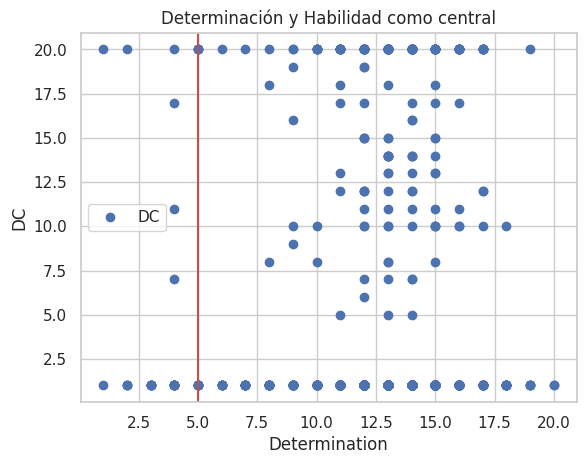

In [120]:
df.plot(x='Determination', y='DC', style="o")
plt.title('Determinación y Habilidad como central')
plt.xlabel('Determination')
plt.ylabel('DC')
plt.axvline(x=5,color='r')
plt.show()

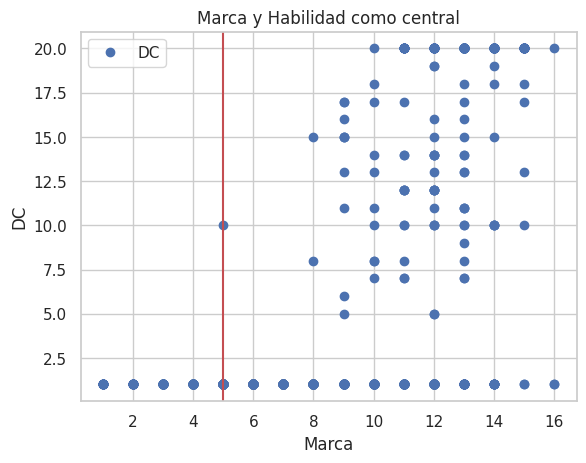

In [121]:
df.plot(x='Marking', y='DC', style="o")
plt.title('Marca y Habilidad como central')
plt.xlabel('Marca')
plt.ylabel('DC')
plt.axvline(x=5,color='r')
plt.show()

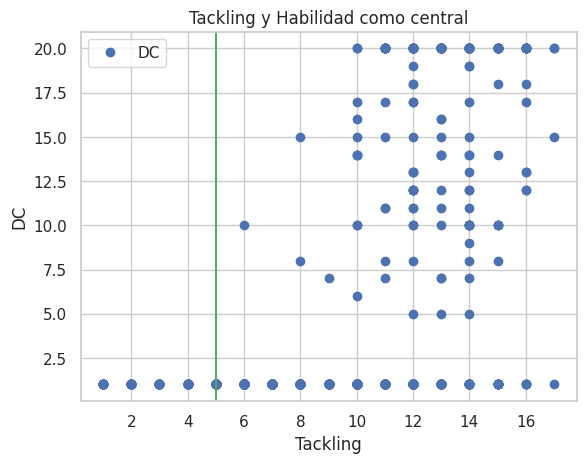

In [122]:
df.plot(x='Tackling', y='DC', style="o")
plt.title('Tackling y Habilidad como central')
plt.xlabel('Tackling')
plt.ylabel('DC')
plt.axvline(x=5,color='g')
plt.show()

Veamos las métricas de estas predicciones

In [123]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [131]:
y_test_pred = tree.predict(X_test) #Prediccion en Test

In [132]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_test_pred)

0.6733668341708543

In [135]:
confusion_matrix(y_test, y_test_pred)

array([[119,   2,   0,   1,   1,   0,   1,   0,   0,   0,   0,   2,   1,
          2,  16],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,
          0,   1],
       [  1,   0,   0,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,
          0,   1],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   2],
       [  1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
       

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


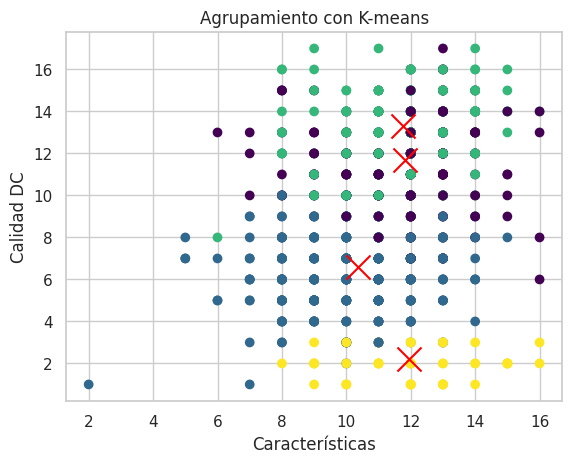

In [124]:

# Extraer las características (features) del DataFrame
X = df[['Concentration','Tackling', 'Decision', 'Determination', 'Flair', 'Leadership', 'Command Of Area', 'Communication', 'Marking', 'DC']].values

# Especificar el número de clusters (K)
n_clusters = 4

# Crear un objeto KMeans
kmeans = KMeans(n_clusters=n_clusters)

# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener las etiquetas de los clusters y los centroides
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualizar los datos agrupados
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=300, c='red')
plt.title('Agrupamiento con K-means')
plt.xlabel('Características')
plt.ylabel('Calidad DC')
plt.show()
df_clustered = df.copy()  # Copiar el DataFrame original
df_clustered['cluster_label'] = labels


##Data Storytelling

Veamos algunas medidas estadísticas de variables relevantes y visualicemos correlaciones.


In [125]:
df [['ca','pa','Age', 'Values', 'Salary']].describe().T

count          mean           std     min        25%        50%  \
ca      995.0  1.190221e+02  1.254888e+01    55.0      112.0      121.0   
pa      995.0  8.977387e+01  8.671996e+01   -85.0       56.0      135.0   
Age     995.0  2.340905e+01  3.817322e+00    16.0       20.0       23.0   
Values  995.0  1.166142e+07  1.731039e+07  2694.0  1803688.5  4156702.0   
Salary  995.0  1.751156e+04  2.863576e+04     0.0     3339.0     7516.0   

               75%          max  
ca           126.0        162.0  
pa           141.0        176.0  
Age           26.0         35.0  
Values  12572515.5  142679281.0  
Salary     19719.0     405971.0

In [126]:
df [['ca','pa','Age', 'Values', 'Salary']].corr()

ca        pa       Age    Values    Salary
ca      1.000000  0.612502  0.609316  0.010541  0.550617
pa      0.612502  1.000000  0.596955 -0.499794  0.266325
Age     0.609316  0.596955  1.000000 -0.377930  0.350763
Values  0.010541 -0.499794 -0.377930  1.000000  0.222928
Salary  0.550617  0.266325  0.350763  0.222928  1.000000

In [127]:
df.columns

Index(['Name', 'Age', 'ca', 'pa', 'Nationality', 'Club', 'Corners', 'Crossing',
       'Dribbling', 'Finishing', 'First Touch', 'Free Kick Taking', 'Heading',
       'Long Shots', 'Long Throws', 'Marking', 'Passing', 'Penalty Taking',
       'Tackling', 'Technique', 'Aggressiion', 'Anticipation', 'Bravery',
       'Composure', 'Concentration', 'Vision', 'Decision', 'Determination',
       'Flair', 'Leadership', 'Off The Ball', 'Teamwork', 'Work Rate',
       'Acceleration', 'Agility', 'Balance', 'Jumping Reach',
       'Natural Fitness', 'Pace', 'Stamina', 'Strength', 'Stability', 'Foul',
       'Contest performance', 'Injury', 'diversity', 'Aerial Reach',
       'Command Of Area', 'Communication', 'Eccentricity', 'Handling',
       'Kicking', 'One On Ones', 'Reflexes', 'Rushing Out', 'Punching',
       'Throwing', 'Adaptation', 'Ambition', 'Argue', 'Loyal',
       'Resistant to stress', 'Professional', 'Sportsmanship',
       'Emotional control', 'GK', 'DL', 'DC', 'DR', 'WBL', 'WBR', 

<Axes: xlabel='Eccentricity', ylabel='Values'>

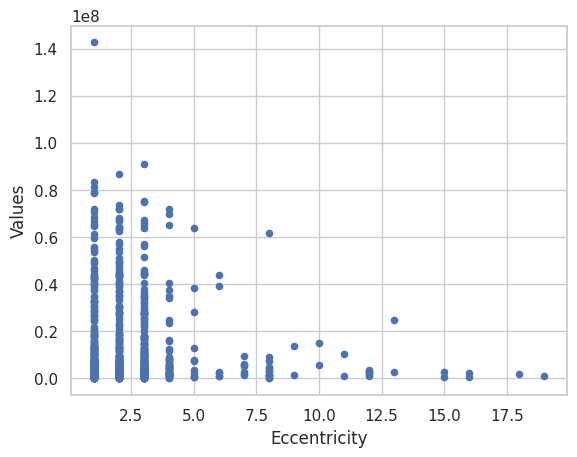

In [128]:
df.plot.scatter(x='Eccentricity', y='Values')

Veamos cómo se relacionan las características de pegada y regate (y la aparición de jugadores con esas características)

<Axes: xlabel='Dribbling', ylabel='Kicking'>

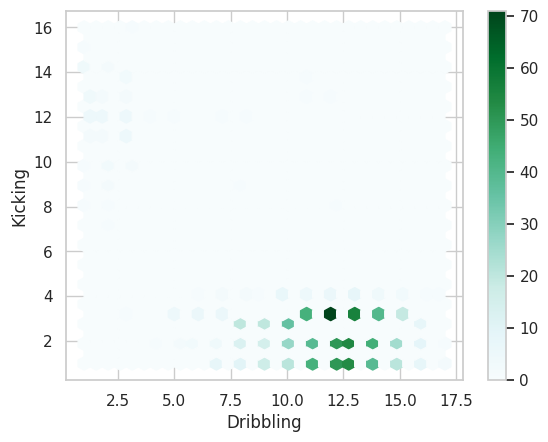

In [129]:
df.plot.hexbin(x='Dribbling', y='Kicking', gridsize=30)

Generemos una visualización de características que esperamos en defensores

In [147]:
df_defensor=df[['Concentration', 'Vision', 'Decision', 'Determination', 'Flair', 'Leadership', 'Command Of Area', 'Communication']]
df_defensor

Concentration  Vision  Decision  Determination  Flair  Leadership  \
56               13      11        14             18     13          16   
157              12      16        16             15     15           6   
175              16      11        15             15     12          14   
211              12      10        11             16     16           8   
217              14      11        15             13     14          11   
262              13      10        13             14     14          12   
270              13      14        15             13     13           9   
290              13      14        13             17     13          14   
292              14      13        14             14     13          10   
317               8      14        13             10     15           6   
331              14      12        13             19     11          14   
364              13      12        12             15     12          11   
371               8      12        11              8     18           7   
381              12      13        13             15     16          11   
396              13      12        13             16     10          10   
397              13      14        12             17     15           8   
406              14      14        13             18      8          15   
422              11      14        14             15     15          10   
426              15      14        12             16     13          10   
446              13      12        13             14     10          12   
478              15      12        14             13     14           9   
486              13      14        14             17     14          13   
503              13      11        12             13     11           9   
508              12      13        14             13     14          13   
532              10      14        13             12     15           9   
538              12      12        12             14     12           8   
549              12      12        13             12     11          11   
566              16      15        15             13     11           8   
574              13      13        13             13     10           9   
599              13      14        11             17     12          13   
605              12      16        15             14     15           6   
614              12      13        14             15     12          12   
633              14      15        15             16     18          17   
655              12       8        13             14     13          12   
665              14       8        13             14      6           8   
674              14       9        14             13      8          13   
692               8      15        11             10     15           7   
696              13      11        12             12      3          10   
701              11      12        12             18     10          14   
714              15      12        15             14      8          15   
733              12      14        13             14      8           8   
737              11      12        11             16     15          10   
777              10      11        10             15     15           7   
782              10      12        11             15     14          13   
797              11      14        12             12     17           7   
799              11      13        11             15     14           7   
810              14      12        13             13     13           8   
834              13      12        13             14     10          11   
846              15      14        13             14     11          11   
874              12      14        15             13     16           9   
877              11      14        12             16     16          11   
887              10      13        13             11     16           5   
893              14      13    

<Axes: >

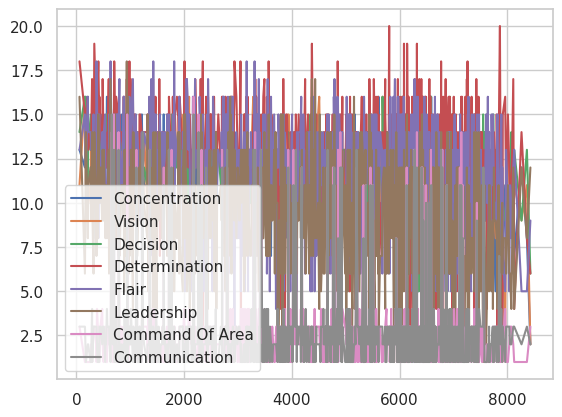

In [148]:
df_defensor.plot.line()

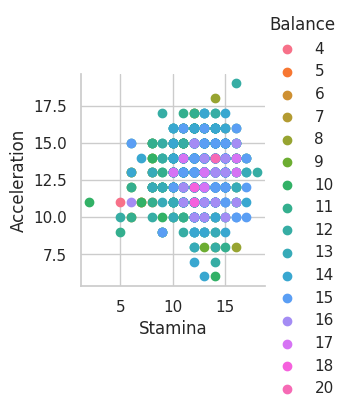

In [150]:
sns.FacetGrid(df,hue = 'Balance').map(plt.scatter,'Stamina','Acceleration').add_legend();
plt.show()

Vemos en el cuadro, como se esperaba, que los jugadores con más balance físico se concentran en los puntos más altos de aguante y aceleración.

## Recomendaciones preliminares






*  Tener una plantilla con jugadores con una edad de entre 25 y 30 años repercutirá en un mayor gasto en salarios.
*  Es muy difícil encontrar una oportunidad para invertir en promesas a bajo costo.
* La calidad actual y el pico esperado tampoco parecen mostrar oportunidades para inversión, por lo que, a priori, el análisis resulta más efectivo para buscar resultados deportivos y no económicos a corto plazo.
* Basándonos en búsqueda de resultados deportivos, llegaremos a éxito en la competencia y, en consecuencia, aumento en las ganancias.